# Importing libraries.

In [231]:
import numpy as np 
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , RepeatedStratifiedKFold , cross_val_score , RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score ,roc_auc_score ,classification_report , roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
warnings.filterwarnings('ignore')

# Importing DataSet

In [354]:
df = pd.read_csv('TAB_TEST_PY.csv')
df['balance_deal_sum'].fillna(df['balance_deal_sum'].mean(),inplace = True)
df['WOE_balance_deal_sum'].fillna(df['WOE_balance_deal_sum'].mean(),inplace = True)
df.drop('DealID',axis = 1,inplace = True)
Score = df['Scores']
hhi = df.loc[:,['RepDate_end','Scores']]
training = df.iloc[:,2:40]
woe_char = df.iloc[:,20:]
woe_char.drop('Scores',axis = 1,inplace = True)
woe_char['WOE_balance_deal_sum'].fillna(woe_char['WOE_balance_deal_sum'].mean(),inplace = True)
woe_char['will_default'] = np.where(woe_char['will_default'].isin([0]),1,0)
pd.crosstab(woe_char['WOE_avg_arr_6_avg_bal_6'],woe_char['will_default'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310306 entries, 0 to 310305
Data columns (total 41 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   RepDate_end                                310306 non-null  int64  
 1   balance_deal_sum                           310306 non-null  float64
 2   mob                                        310306 non-null  int64  
 3   max_dpd_1                                  310306 non-null  int64  
 4   max_dpd_3                                  310306 non-null  int64  
 5   max_dpd_6                                  310306 non-null  int64  
 6   max_dpd_12                                 310306 non-null  int64  
 7   mnths_snc_dpd_gt_0                         310306 non-null  int64  
 8   mnths_snc_dpd_gt_30                        310306 non-null  int64  
 9   mnths_snc_dpd_gt_60                        310306 non-null  int64  
 10  prc_of_m

In [355]:
lolframe = df.iloc[:,20:40]
k = lolframe.columns[:-2].tolist()
joj = lolframe.copy()
#lolframe['WOE_balance_deal_sum'].fillna(lolframe['WOE_balance_deal_sum'].mean(),inplace = True)
for i in lolframe.columns:
    lolframe[i] = lolframe[i].apply(lambda x:str(x))
#lolframe = pd.get_dummies(lolframe,prefix_sep =':')
#lolframe = pd.concat([lolframe,df['RepDate_end'],df['will_default']],axis = 1)
lolframe

,WOE_balance_deal_sum,WOE_mob,WOE_max_dpd_1,WOE_max_dpd_3,WOE_max_dpd_6,WOE_max_dpd_12,WOE_mnths_snc_dpd_gt_0,WOE_mnths_snc_dpd_gt_30,WOE_mnths_snc_dpd_gt_60,WOE_prc_of_month_with_DPD_grt_0_3_months,WOE_prc_of_month_with_DPD_grt_0_6_months,WOE_prc_of_month_with_DPD_grt_0_12_months,WOE_avg_bal_1_avg_bal_3,WOE_avg_bal_1_avg_bal_6,WOE_avg_bal_1_avg_bal_12,WOE_avg_bal_1_3_avg_bal_4_6,WOE_avg_arr_1_avg_bal_1,WOE_avg_arr_3_avg_bal_3,WOE_avg_arr_6_avg_bal_6,Scores
0,0.16096808,0,1.5116980309999999,1.7564915769999998,1.8296821,0,0.908130888,0.921639126,0,1.547085946,1.57364542,1.504844656,0.352500889,0.052668715,-0.070751925,-0.010174826,0.896510782,1.11981063,1.394433416,742.3334358
1,0.16096808,0,1.5116980309999999,-0.278307293,-1.168635698,0,0.908130888,0.921639126,0,1.547085946,-0.916783589,1.504844656,0.352500889,1.0977720309999999,0.934545293,0.797666419,0.896510782,1.11981063,-2.59150516,671.7328382000001
2,-0.32637154399999996,0,1.5116980309999999,1.7564915769999998,1.8296821,0,2.440646475,0.921639126,0,1.547085946,1.57364542,1.504844656,0.352500889,0.052668715,-0.070751925,-0.010174826,0.896510782,1.11981063,1.394433416,764.0405074
3,0.16096808,0,-0.375361677,-0.278307293,-1.168635698,0,-1.620505875,0.921639126,0,-2.293477123,-2.53503913,-2.587843513,0.352500889,0.052668715,-0.070751925,-0.010174826,0.896510782,1.11981063,-2.59150516,600.0617295
4,-0.32637154399999996,0,1.5116980309999999,1.7564915769999998,1.8296821,0,2.440646475,0.921639126,0,1.547085946,1.57364542,1.504844656,0.352500889,0.052668715,-0.070751925,-0.010174826,0.896510782,1.11981063,1.394433416,764.0405074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310301,0.16096808,0,1.5116980309999999,1.7564915769999998,1.8296821,0,0.908130888,0.921639126,0,1.547085946,1.57364542,1.504844656,0.352500889,0.052668715,-0.070751925,-0.010174826,0.896510782,1.11981063,1.394433416,742.3334358
310302,0.16096808,0,1.5116980309999999,1.7564915769999998,1.8296821,0,2.440646475,0.921639126,0,1.547085946,1.57364542,1.504844656,0.352500889,0.052668715,-0.070751925,-0.010174826,0.896510782,1.11981063,1.394433416,764.0405074
310303,0.16096808,0,1.5116980309999999,1.7564915769999998,1.8296821,0,2.440646475,0.921639126,0,1.547085946,1.57364542,1.504844656,0.352500889,0.052668715,-0.070751925,-0.010174826,0.896510782,1.11981063,1.394433416,764.0405074
310304,0.16096808,0,1.5116980309999999,1.7564915769999998,1.8296821,0,2.440646475,0.921639126,0,1.547085946,1.57364542,1.504844656,0.352500889,1.0977720309999999,0.934545293,0.797666419,0.896510782,1.11981063,1.394433416,800.4190768999999


In [356]:
df['RepDate_end'] = pd.to_datetime(df['RepDate_end'],format='%Y%m%d', errors='ignore')
df['RepDate_end'] = df['RepDate_end'].apply(str)
df['RepDate_end'] = df['RepDate_end'].apply(lambda x:x.split(' 00')[0])

In [357]:
df1 = df.iloc[:,0:20]
df = pd.concat([df['will_default'],df1],axis = 1)

In [358]:
df['balance_deal_sum'].fillna(df['balance_deal_sum'].median(),inplace = True)

# 2.Calculate Gini for Train and Test Sample

In [359]:
def X_train_X_test(train,test):
    X_train = train.drop(target,axis = 1)
    y_train = train[target]
    X_test = test.drop(target,axis = 1)
    y_test = test[target]
    
    model = LogisticRegression()
    model.fit(X_train,y_train)
    train_predict = model.predict(X_train)
    train_gini = roc_auc_score(y_train,train_predict)*2 - 1
    test_predict = model.predict(X_test)
    test_gini = roc_auc_score(y_test,test_predict)*2 - 1
    Gini_Data_Frame = pd.DataFrame(columns = ['Train','Test'])
    return Gini_Data_Frame
#X_train_X_test()

# 3.Calculate Gini over time for each month on Full sample

In [360]:
def ginni_over_month(df,date,training,target,rotation):
    dict = {}
    sorted_date =  sorted(df[date].unique())
    scores = []
    job = df.copy()
    job = df.drop(['RepDate_end'],axis = 1)
    complete = pd.DataFrame(columns = training.columns.values)
    for i in sorted_date: 
        
        dict[i] = [x for x in df.loc[df[date] == i].index]
        
        
        clon = pd.DataFrame(data = job , index = dict[i][0:])
        
        X_train = clon.drop(target,axis = 1)
        y_train = clon[target]
        y_pred = model.predict(X_train)
        roc_auc = roc_auc_score(y_train,y_pred)
        GINI = roc_auc*2 - 1
        scores.append(GINI)
        result = pd.DataFrame({'Date':sorted_date,'Gini':GINI})
        return result
#gini_over_month()

# 4. Calculate Gini for each WOE characteristic on Train and Test samples

In [361]:
woe_train = woe_char.iloc[0:280000,:]
woe_test = woe_char.iloc[280000:,:]
def Gini_for_charact(train,test,woe_char):
    train = pd.DataFrame(data = train,columns = woe_char.columns.values)
    test = pd.DataFrame(data = test,columns = woe_char.columns.values)
    #return len(woe_char.columns.values)
    list = [train,test]
    scores = []
    for i in list:
        for g in i.columns[:-1]:
            
            gini = roc_auc_score(i.iloc[:,-1].values,i[g])*2 - 1
            
            scores.append(gini)
    train_scores = scores[0:19]
    test_scores = scores[19:]
    summary = pd.DataFrame({'Woe_Characteristics':woe_char.columns.values[:-1] , 'Train_Gini':train_scores , 'Test_Gini': test_scores})
    return summary
#Gini_for_charact(woe_train,woe_test,woe_char)

# 5. Calculate Gini for each WOE characteristic over time for each month on Full sample

In [362]:
def Gini_for_charact(df,woe_char):
    train = pd.DataFrame(data = woe_char,columns = woe_char.columns.values)
    sorted_date = sorted(df['RepDate_end'].unique())
    dict = {}
    summary1 = pd.DataFrame()
    for i in sorted_date: 
        scores = []
        dict[i] = [x for x in df.loc[df['RepDate_end'] == i].index]
        clon = pd.DataFrame(data = train , index = dict[i][0:])
   

        for g in clon.columns[:-1]:
            gini = roc_auc_score(clon.iloc[:,-1].values,clon[g])*2 - 1
            scores.append(gini)
    
            summary = pd.DataFrame()
            summary = pd.DataFrame(columns = [i] , data = scores )
    
        
        summary1 = pd.concat([summary1,summary],axis = 1)
    summary1.insert(0,'Characteristics',woe_char.columns.values[:-1])
        
    return summary1.head(25)
#Gini_for_charact(df,woe_char)

# (No number). Dashboard distribution 

In [363]:
dist1= pd.concat([Score,df['will_default']],axis = 1)
dist1.columns = ['Score','Status']
dist1 = dist1.reset_index(False)
dist = dist1.iloc[:,[1,2]]
score = round(Score)

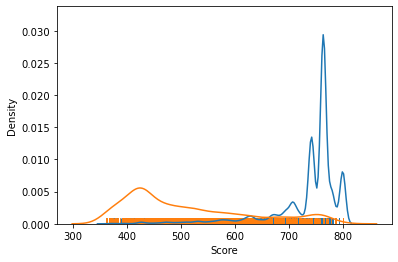

<Figure size 1152x648 with 0 Axes>

In [364]:
def dashboard(min1,max1,cut):
    list = [int(x) for x in np.linspace(min1,max1,cut)]
    for i in range(len(list)):
        if i < cut-1:
                a = (list[i]+list[i+1])/2
                dist.loc[dist['Score'].isin(range(list[i],list[i+1])),'Score'] = a
                i = i + 1
                 
    dist['Score'] = round(dist['Score'],0)
    
    unique_vals = dist['Status'].unique()  
    targets = [dist.loc[dist['Status'] == val] for val in unique_vals]
    
    for target in targets:
        sns.distplot(target[['Score']], hist=False, rug=True)
    plt.ylabel('Density')
    plt.xlabel('Score')
    
    plt.figure(figsize=(16,9))
    
 
dashboard(361,801,100) 

# 6. Based on the Train sample define the intervals for 10 score groups 
(the interval width is defined as (max(score)-min(score))/10 so that we have, for instance 0-100, 100-200 … 900-1000) - reference intervals and reference shares

In [383]:
score_intervals = pd.concat([score,df],axis = 1)
intervals = pd.cut(score_intervals['Scores'],10)
score_intervals = pd.concat([intervals, score_intervals.iloc[:,0:3]],axis = 1)
score_intervals.columns = ['Intervals','Scores','will_default','RepDate_end']
score_intervals

,Intervals,Scores,will_default,RepDate_end
0,"(712.2, 756.1]",742.0,0,2019-03-31
1,"(668.3, 712.2]",672.0,0,2019-03-31
2,"(756.1, 800.0]",764.0,0,2019-02-28
3,"(580.5, 624.4]",600.0,0,2018-07-31
4,"(756.1, 800.0]",764.0,0,2019-03-31
...,...,...,...,...
310301,"(712.2, 756.1]",742.0,0,2018-12-31
310302,"(756.1, 800.0]",764.0,0,2018-12-31
310303,"(756.1, 800.0]",764.0,0,2018-06-30
310304,"(756.1, 800.0]",800.0,0,2018-11-30


# PSI for every month

In [277]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
def PSI_m(df,z,joj):
    dict = {}
    sorted_date =  sorted(df[z].unique())
    df = pd.concat([df,Score],axis = 1)
    k = joj.columns[:-2].tolist()
    complete = pd.DataFrame(columns = k)
    list = [int(x) for x in np.linspace(300,850,20)]
    for i in sorted_date: 
    
        
        dict[i] = [x for x in df.loc[df[z] == i].index]
        actual = pd.DataFrame(data = df.iloc[:,:-3] , index = dict[i][0:])
        clon = [x for x in sorted_date if x is not i]
        old = df.loc[df[z].isin(clon)]
        old = old.iloc[:,:-3]
        
        

        #for f in range(len(list)):
         #   if f < 19:
          #      actual[f] = np.where((actual['Scores'] >= list[f] ) & (actual['Scores'] < list[f+1]), 1, 0)
           #     old[f] = np.where((old['Scores'] >= list[f] ) & (old['Scores'] < list[f+1]), 1, 0)
            #    f = f + 1
        #old = old.drop('Scores',axis = 1)
        #actual = actual.drop('Scores',axis = 1)
        
        PSI_calc_train = old.sum() / old.shape[0]
        PSI_calc_new =   actual.sum()/ actual.shape[0]
       
        
        PSI = pd.concat([PSI_calc_train,PSI_calc_new],axis = 1)
        PSI = PSI.reset_index()
        PSI.columns = ['index', 'Proportions_Train', 'Proportions_New']
        #return PSI_calc_train
        PSI['Original_name'] = PSI['index'].str.split(':').str[0]
        PSI = PSI[np.array(['index', 'Original_name', 'Proportions_Train', 'Proportions_New'])]
        PSI = PSI[(PSI['index'] != 'Intercept')]

        PSI['Contribution'] = np.where((PSI['Proportions_Train'] == 0) | (PSI['Proportions_New'] == 0),
                                       0, (PSI['Proportions_New'] - PSI['Proportions_Train']) * np.log(PSI['Proportions_New'] / PSI['Proportions_Train'])) 
        PSI_summary = PSI.groupby('Original_name')['Contribution'].sum()
        
        
        j = PSI_summary.tolist()
        k = PSI_summary.index.tolist()
         
        final_df = pd.DataFrame(columns = k)
        df2 = pd.DataFrame([j],columns=k)
        new_row = {}
        
        for num,p in enumerate(final_df.columns.values):
                    
                new_row[p] = j[num]
        
        complete = complete.append(new_row,ignore_index = True)
    complete.insert(0,'Date',sorted_date)
    complete['Date'] = pd.to_datetime(complete['Date'],format = '%Y%m%d')
    #return complete
PSI_m(lolframe,'RepDate_end',joj)

KeyError: 'RepDate_end'

# HHI

In [26]:
hhi['New_Score'] = 0
def hhi1(min1,max1,cut):
    list = [int(x) for x in np.linspace(min1,max1,cut)]
    for i in range(len(list)):
            
            if i < cut-1:
                    a = (list[i]+list[i+1])/2
                    
                    hhi.loc[hhi['Scores'].between(list[i],list[i+1]),'New_Score'] = a 
                    
                    i = i + 1
    return hhi
    
hhi1(360,801,10)

hhi['New_Score'] = round(hhi['New_Score'],0)
hhi1 = hhi.groupby(["RepDate_end","New_Score"]).count()
hhi2 = hhi.groupby(["RepDate_end"])["New_Score"].count()
hhi

,RepDate_end,Scores,New_Score
0,20190331,742.333436,728.0
1,20190331,671.732838,678.0
2,20190228,764.040507,776.0
3,20180731,600.061729,580.0
4,20190331,764.040507,776.0
...,...,...,...
310301,20181231,742.333436,728.0
310302,20181231,764.040507,776.0
310303,20180630,764.040507,776.0
310304,20181130,800.419077,776.0


In [29]:
pd.cut(hhi['Scores'],10)

0          (712.44, 756.429]
1           (668.45, 712.44]
2         (756.429, 800.419]
3           (580.47, 624.46]
4         (756.429, 800.419]
                 ...        
310301     (712.44, 756.429]
310302    (756.429, 800.419]
310303    (756.429, 800.419]
310304    (756.429, 800.419]
310305     (712.44, 756.429]
Name: Scores, Length: 310306, dtype: category
Categories (10, interval[float64]): [(360.082, 404.511] < (404.511, 448.501] < (448.501, 492.491] < (492.491, 536.481] ... (624.46, 668.45] < (668.45, 712.44] < (712.44, 756.429] < (756.429, 800.419]]

In [31]:
def hhil(firm_rev, m_rev):

    firm_rev = firm_rev.reset_index()
    m_size = m_rev.reset_index()
    complete = pd.DataFrame(columns = ['RepDate_end','Whole Concentration'])

    m_size.rename(columns={'RepDate_end': 'RepDate_end', 'New_Score': 'NS'}, inplace=True)
    firm_rev.rename(columns={'RepDate_end': 'RepDate_end', 'New_Score': 'NS','Scores': 'Amount'}, inplace=True)
    for i in firm_rev['RepDate_end'].unique():   
            test = pd.DataFrame(firm_rev.loc[firm_rev['RepDate_end'] == i])
            test['pop'] = test['Amount'] / test['Amount'].sum()
            test['Concentration'] = test['pop']**2
            test['Whole Concentration'] = test['Concentration'].sum()
            
            test = test.iloc[:,[0,5]][:1]
            complete = pd.concat([complete,test],axis = 0)
    #return test
    complete['RepDate_end'] = pd.to_datetime(complete['RepDate_end'], format = '%Y%m%d')
    return complete       

hhil(hhi1, hhi2)

,RepDate_end,Whole Concentration
0,2018-05-31,0.380424
9,2018-06-30,0.382858
18,2018-07-31,0.380926
27,2018-08-31,0.373473
36,2018-09-30,0.373962
45,2018-10-31,0.380048
54,2018-11-30,0.392867
63,2018-12-31,0.406203
72,2019-01-31,0.391563
81,2019-02-28,0.404981


# Train Sample 10 dummies of Score:
6. Based on the Train sample define the intervals for 10 score groups (the interval width is defined as (max(score)-min(score))/10 so that we have, for instance 0-100, 100-200 … 900-1000) - reference intervals and reference shares

In [ ]:
X_train 

# END 

In [ ]:
X_new.columns.values[X_new.shape[1] - 1] = 'Score'
first.columns.values[first.shape[1] - 1] = 'Score'

In [ ]:
X_new['Score:350-400'] = np.where((X_new['Score'] >= 351) & (X_new['Score'] < 400), 1, 0)
X_new['Score:400-450'] = np.where((X_new['Score'] >= 400) & (X_new['Score'] < 450), 1, 0)
X_new['Score:450-500'] = np.where((X_new['Score'] >= 450) & (X_new['Score'] < 500), 1, 0)
X_new['Score:500-550'] = np.where((X_new['Score'] >= 500) & (X_new['Score'] < 550), 1, 0)
X_new['Score:550-600'] = np.where((X_new['Score'] >= 550) & (X_new['Score'] < 600), 1, 0)
X_new['Score:600-650'] = np.where((X_new['Score'] >= 600) & (X_new['Score'] < 650), 1, 0)
X_new['Score:650-700'] = np.where((X_new['Score'] >= 650) & (X_new['Score'] < 700), 1, 0)
X_new['Score:700-750'] = np.where((X_new['Score'] >= 700) & (X_new['Score'] < 750), 1, 0)
X_new['Score:750-800'] = np.where((X_new['Score'] >= 750) & (X_new['Score'] < 800), 1, 0)

# We create dummy variables for score intervals in the dataframe with old ("expected").

In [ ]:
first['Score:300-350'] = np.where((first['Score'] >= 300) & (first['Score'] < 351), 1, 0)
first['Score:350-400'] = np.where((first['Score'] >= 351) & (first['Score'] < 400), 1, 0)
first['Score:400-450'] = np.where((first['Score'] >= 400) & (first['Score'] < 450), 1, 0)
first['Score:450-500'] = np.where((first['Score'] >= 450) & (first['Score'] < 500), 1, 0)
first['Score:500-550'] = np.where((first['Score'] >= 500) & (first['Score'] < 550), 1, 0)
first['Score:550-600'] = np.where((first['Score'] >= 550) & (first['Score'] < 600), 1, 0)
first['Score:600-650'] = np.where((first['Score'] >= 600) & (first['Score'] < 650), 1, 0)
first['Score:650-700'] = np.where((first['Score'] >= 650) & (first['Score'] < 700), 1, 0)
first['Score:700-750'] = np.where((first['Score'] >= 700) & (first['Score'] < 750), 1, 0)
first['Score:750-800'] = np.where((first['Score'] >= 750) & (first['Score'] < 800), 1, 0)
first['Score:800-850'] = np.where((first['Score'] >= 800) & (first['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

In [ ]:
PSI_calc_train = first.sum() / first.shape[0]
PSI_calc_new = X_new.sum() / X_new.shape[0]

In [ ]:
PSI = pd.concat([PSI_calc_train,PSI_calc_new],axis = 1)
PSI = PSI.reset_index()
PSI.columns = ['index', 'Proportions_Train', 'Proportions_New']
PSI['Original_name'] = PSI['index'].str.split(':').str[0]
PSI = PSI[np.array(['index', 'Original_name', 'Proportions_Train', 'Proportions_New'])]
PSI = PSI[(PSI['index'] != 'Intercept')]

PSI['Contribution'] = np.where((PSI['Proportions_Train'] == 0) | (PSI['Proportions_New'] == 0),
                               0, (PSI['Proportions_New'] - PSI['Proportions_Train']) * np.log(PSI['Proportions_New'] / PSI['Proportions_Train']))

# CREATING SCORECARD

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = X_train.columns.values)
summary_table['Coefficients'] = model.coef_.reshape(84,1)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table.sort_index(inplace = True)

In [ ]:
summary_table

In [ ]:
y_hat_test = model.predict(X_test)
y_hat_test_proba = model.predict_proba(X_test) 
y_hat_test_proba = y_hat_test_proba[: , 1]

In [ ]:
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [ ]:
y_test_proba

In [ ]:
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
y_test_proba.index = X_test.index
y_test_proba

In [ ]:
tr = 0.5
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [ ]:
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
GINI = AUROC*2 - 1
AUROC , GINI

In [ ]:
no_skill = len(y_test[y_test == 1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [ ]:
auc_pr = auc(recall, precision)
auc_pr

In [ ]:
df_scorecard = summary_table.copy()
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [ ]:
min_score = 1
max_score = 751

min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

In [ ]:
df_scorecard.loc[0, 'Score - Calculation']

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

In [ ]:
score_card = df_scorecard.iloc[:,[0,4]]

In [ ]:
score_card

In [ ]:
X_test.insert(0, 'Intercept', 1)
y_scores = X_test.dot(score_card['Score - Preliminary'].values)

In [ ]:
y_scores

# HHI TEST (Herhindahl

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
def n_approved(p):
    return np.where(y_test_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = y_test_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / y_test_proba['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [ ]:
df_cutoffs

In [ ]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))

In [ ]:
df_cutoffs.loc[df_cutoffs['thresholds'].between(0.27788,0.277890)]

In [ ]:
###CUT OF IS 490

#df_scorecard.to_csv('df_scorecard.csv')